### LetsGrowMore Task_2 EDA 

### Objective : As a security/defense analyst, try to find out the hot zone of terrorism. 
## Alex paul 


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
from plotly import tools

In [2]:
df=pd.read_csv("D:\\data sets\\LetsGrow\\globalterrorismdb_0718dist.csv",encoding = "ISO-8859-1")

c:\users\lex\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.



In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df =  df[["iyear","imonth","iday","country_txt","region_txt",
          "city","latitude","longitude","success","suicide",
          "attacktype1_txt",
          "targtype1_txt","targsubtype1_txt","natlty1_txt",
          "gname","motive","weaptype1_txt",
          "weapsubtype1_txt","nkill","propextent_txt","propvalue","ransom","ransomamt",
          "ransompaid","hostkidoutcome_txt"]]
df.head()

,iyear,imonth,iday,country_txt,region_txt,city,latitude,longitude,success,suicide,...,motive,weaptype1_txt,weapsubtype1_txt,nkill,propextent_txt,propvalue,ransom,ransomamt,ransompaid,hostkidoutcome_txt
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1,0,...,NaN,Unknown,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,1,0,...,NaN,Unknown,NaN,0.0,NaN,NaN,1.0,800000.0,NaN,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,1,0,...,NaN,Unknown,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,1,0,...,NaN,Explosives,Unknown Explosive Type,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,1,0,...,NaN,Incendiary,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [5]:

df.rename(columns={'iyear': 'year','imonth': 'month','iday': 'day','country_txt': 'country_name',
            'region_txt': 'region_name','attacktype1_txt': 'attacktype',
            'targtype1_txt': 'targtype',
            'targsubtype1_txt': 'targsubtype','gname': 'terrst_group_name','natlty1_txt': 'targt_natly',
            'weaptype1_txt': 'weaptype',
            'weapsubtype1_txt': 'weapsubtype','nkill': 'casualities',
            'propextent_txt': 'proprty_damage',
            'ransompaid': 'ransom_amt_paid','hostkidoutcome_txt': 'host_outcom',
            }, inplace=True)

In [6]:

df.nunique()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   year               181691 non-null  int64  
 1   month              181691 non-null  int64  
 2   day                181691 non-null  int64  
 3   country_name       181691 non-null  object 
 4   region_name        181691 non-null  object 
 5   city               181257 non-null  object 
 6   latitude           177135 non-null  float64
 7   longitude          177134 non-null  float64
 8   success            181691 non-null  int64  
 9   suicide            181691 non-null  int64  
 10  attacktype         181691 non-null  object 
 11  targtype           181691 non-null  object 
 12  targsubtype        171318 non-null  object 
 13  targt_natly        180132 non-null  object 
 14  terrst_group_name  181691 non-null  object 
 15  motive             50561 non-null   object 
 16  we

In [7]:
#Most targeted region 
print("most targeted region: ",df["region_name"].value_counts().index[0] )

#Most targeted nationality
print("most targeted nationality: " ,df["targt_natly"].value_counts().index[0])

#Most targeted city
print("most targeted city: ",df["city"].value_counts().index[1]) # first entry unknown

#most attack happened in whixh year
print("most attack happened in the year of ",df["year"].value_counts().index[0])

#most prominant terrorist group
print("most prominant terrorist group: ",df["terrst_group_name"].value_counts().index[1]) # first entry unknown 

#most prominant attack type
print("most prominant attack type: ",df["attacktype"].value_counts().index[0])

most targeted region:  Middle East & North Africa
most targeted nationality:  Iraq
most targeted city:  Baghdad
most attack happened in the year of  2014
most prominant terrorist group:  Taliban
most prominant attack type:  Bombing/Explosion


In [8]:
sns.color_palette?


c:\users\lex\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'No.Of terrorist activities each year')

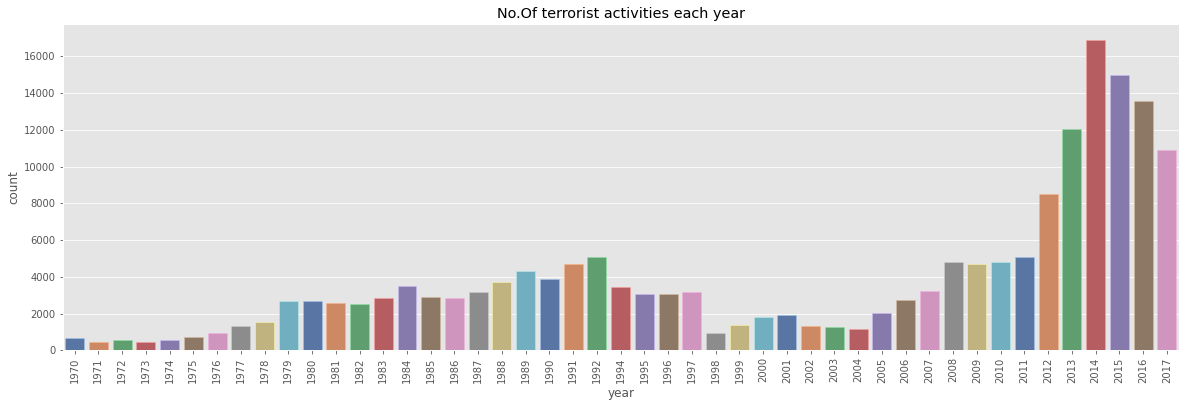

In [9]:
plt.subplots(figsize=(20,6))
sns.countplot("year",data=df,palette='deep',edgecolor=sns.color_palette('pastel',10))
plt.xticks(rotation=90)
plt.title('No.Of terrorist activities each year')

### terrorism is mainly observed in the year 2007 and above

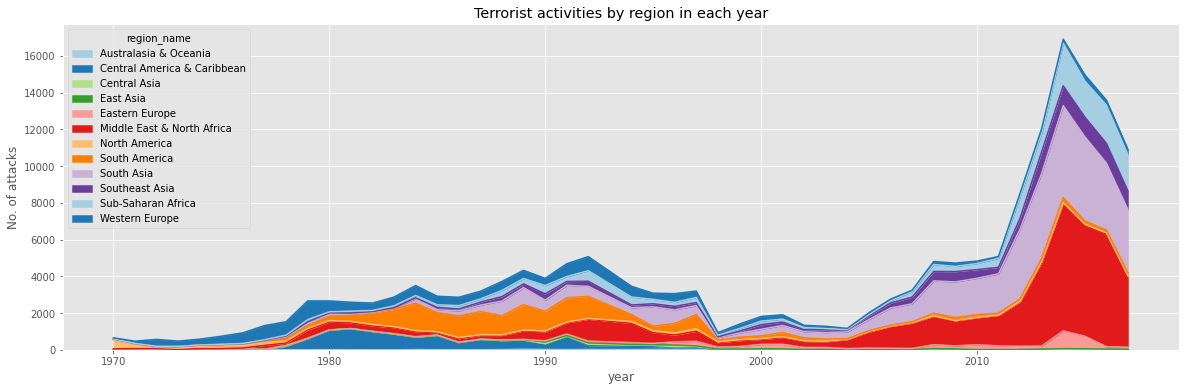

In [10]:
#Now we will try plotting no.of attacks vs year 

pd.crosstab(df.year, df.region_name).plot(color=sns.color_palette('Paired', 10),kind = "area",figsize = (20,6))
plt.title('Terrorist activities by region in each year')
plt.ylabel('No. of attacks')
plt.show()

<AxesSubplot:>

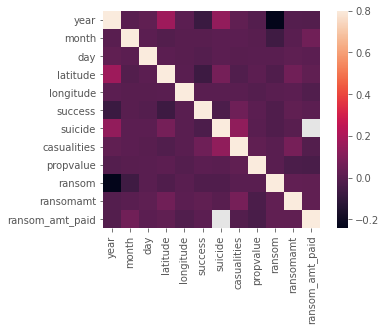

In [11]:
#Plotting a corr graph
corr_mat = df.corr()
#f,ax = plt.subplots(figsize = (40,30))
sns.heatmap(corr_mat, vmax = 0.8, square= True)

c:\users\lex\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Top ten regions got attacked by terrorist')

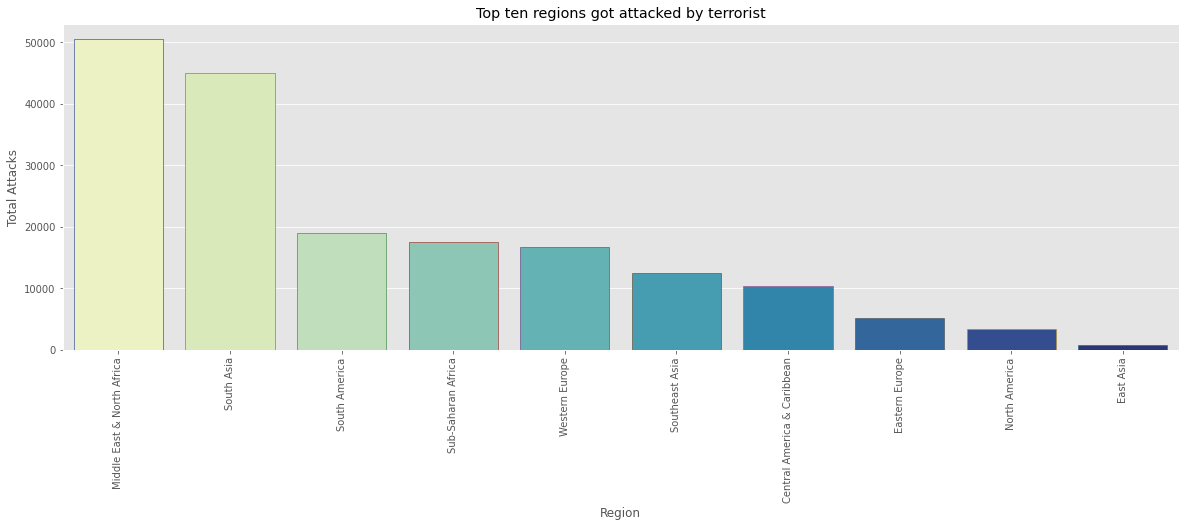

In [12]:
region_atkd = df.region_name.value_counts()[:10].reset_index()
region_atkd.columns = ['Region', 'Total Attacks']
plt.subplots(figsize=(20,6))
sns.barplot(region_atkd.Region,region_atkd["Total Attacks"], palette='YlGnBu',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Top ten regions got attacked by terrorist')

#### So it is observed that the Middle East and North America faced more attacks compared to other counties. And the region that faced few attacks is East Asia. The second most affected region is South Asia.

In [13]:
city_caslty = df.groupby('city').casualities.sum().to_frame().reset_index().sort_values("casualities",ascending = False)[:10]
city_atkd = df.city.value_counts()[:10].reset_index()
city_atkd.columns = ['city', 'Total Attacks']

In [14]:
city_tot = pd.merge(city_atkd, city_caslty, how='left', on='city').sort_values('Total Attacks', ascending=False)[:10]
print("Top ten cities with more attacks and casualities \n\n",city_tot)

Top ten cities with more attacks and casualities 

            city  Total Attacks  casualities
0       Unknown           9775      22647.0
1       Baghdad           7589      21151.0
2       Karachi           2652       3688.0
3          Lima           2359          NaN
4         Mosul           2265       7140.0
5       Belfast           2171          NaN
6      Santiago           1621          NaN
7     Mogadishu           1581       3913.0
8  San Salvador           1558          NaN
9      Istanbul           1048          NaN


Text(0.5, 1.0, 'Attacktype')

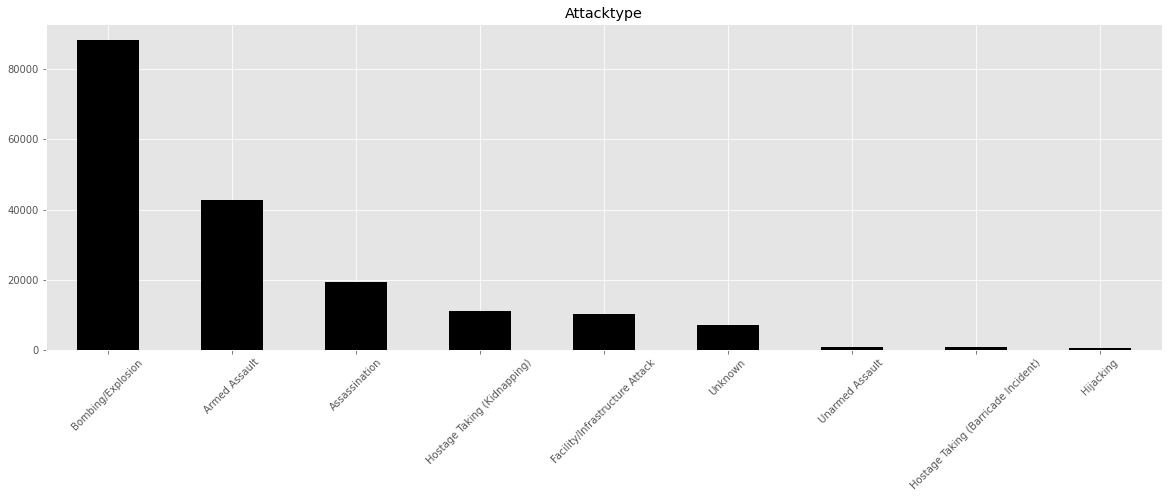

In [15]:
df['attacktype'].value_counts().plot(kind='bar',figsize=(20,6),color='Black')
plt.xticks(rotation = 45)
plt.title("Attacktype")

### From the above graph it is observed that the most number of terroris attacks created is due to bombing and explosion 

In [30]:
df.columns

Index(['year', 'month', 'day', 'country_name', 'region_name', 'city',
       'latitude', 'longitude', 'success', 'suicide', 'attacktype', 'targtype',
       'targsubtype', 'targt_natly', 'terrst_group_name', 'motive', 'weaptype',
       'weapsubtype', 'casualities', 'proprty_damage', 'propvalue', 'ransom',
       'ransomamt', 'ransom_amt_paid', 'host_outcom'],
      dtype='object')

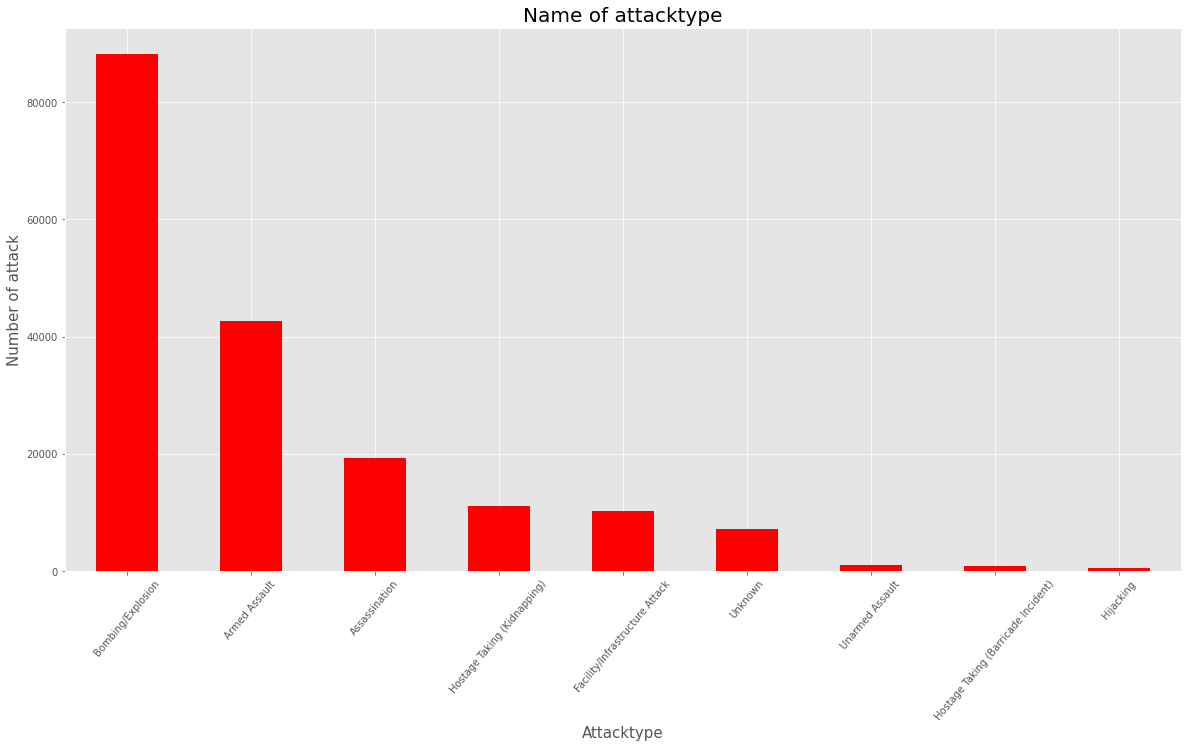

In [32]:

df['attacktype'].value_counts().plot(kind='bar',figsize=(20,10),color='r')
plt.xticks(rotation = 50)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Name of attacktype",fontsize=20)
plt.show()

In [36]:
countryKill = df.pivot_table(columns='city', values='casualities', aggfunc='sum')
countryKill

city,Baghdad,Maiduguri,Mogadishu,Mosul,New York City,Ramadi,Tikrit,Unknown
casualities,5179.0,2171.0,2845.0,4760.0,2767.0,1299.0,1920.0,2944.0


In [35]:
df=df[['terrst_group_name','city','casualities']]
df=df.groupby(['terrst_group_name','city'],axis=0).sum().sort_values('casualities',ascending=False).drop('Unknown').reset_index().head(10)
df

c:\users\lex\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



,terrst_group_name,city,casualities
0,Islamic State of Iraq and the Levant (ISIL),Mosul,4760.0
1,Islamic State of Iraq and the Levant (ISIL),Baghdad,3322.0
2,Al-Shabaab,Mogadishu,2845.0
3,Al-Qaida,New York City,2767.0
4,Boko Haram,Maiduguri,2171.0
5,Islamic State of Iraq and the Levant (ISIL),Tikrit,1920.0
6,Al-Qaida in Iraq,Baghdad,1857.0
7,Islamic State of Iraq and the Levant (ISIL),Unknown,1651.0
8,Islamic State of Iraq and the Levant (ISIL),Ramadi,1299.0
9,Taliban,Unknown,1293.0


Text(0.5, 1.0, 'Hostages of Terrorist Attack')

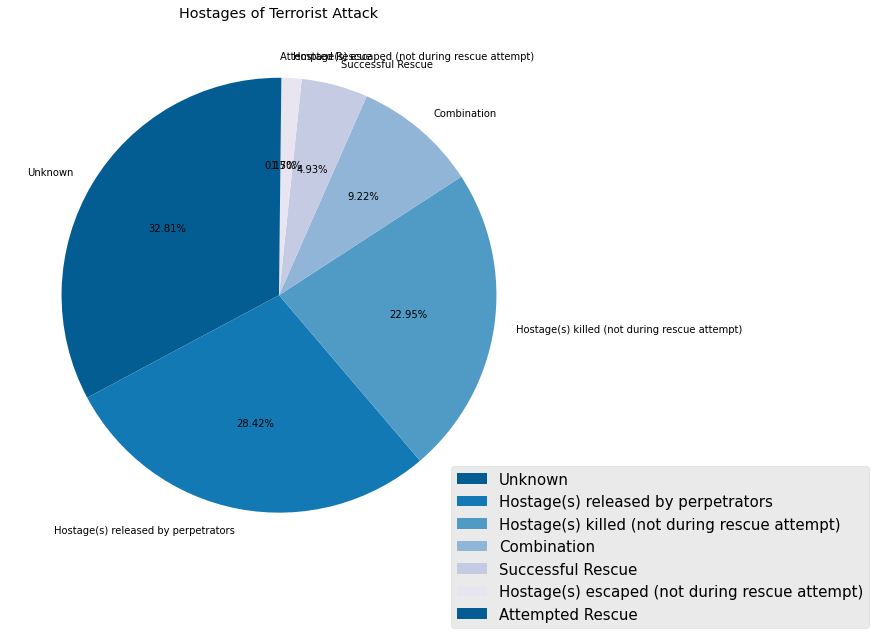

In [17]:
labels = ["Unknown","Hostage(s) released by perpetrators","Hostage(s) killed (not during rescue attempt)","Combination","Successful Rescue",
          "Hostage(s) escaped (not during rescue attempt)","Attempted Rescue"]
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
colors = sns.color_palette('PuBu_r')[0:6]
plt.pie(df.host_outcom.value_counts(), labels =labels,startangle=90, autopct='%.2f%%',colors =colors )
plt.legend(labels, loc='upper right', bbox_to_anchor = (1.6, .2), fontsize=15)
plt.title("Hostages of Terrorist Attack")

### We can observe the different varation in the brulat death of the hoatages and the rate of survival 

## Conclusion and Results :

## Country with the most attacks: Iraq

## City with the most attacks: Baghdad

## Region with the most attacks: Middle East & North Africa

## Year with the most attacks: 2014

## Month with the most attacks: 5

## Group with the most attacks: Taliban

## Most Attack Types: Bombing/Explosion 